**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# import data 2C_weka.csv for 2 Class Classifcation.


In [4]:
class2=pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [5]:
class2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
class2.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [8]:
class2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [9]:
class2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [16]:
unique_entry=class2['class'].unique()
print("unique_entry for class:",unique_entry)

unique_entry for class: ['Abnormal' 'Normal']


In [28]:
class2.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


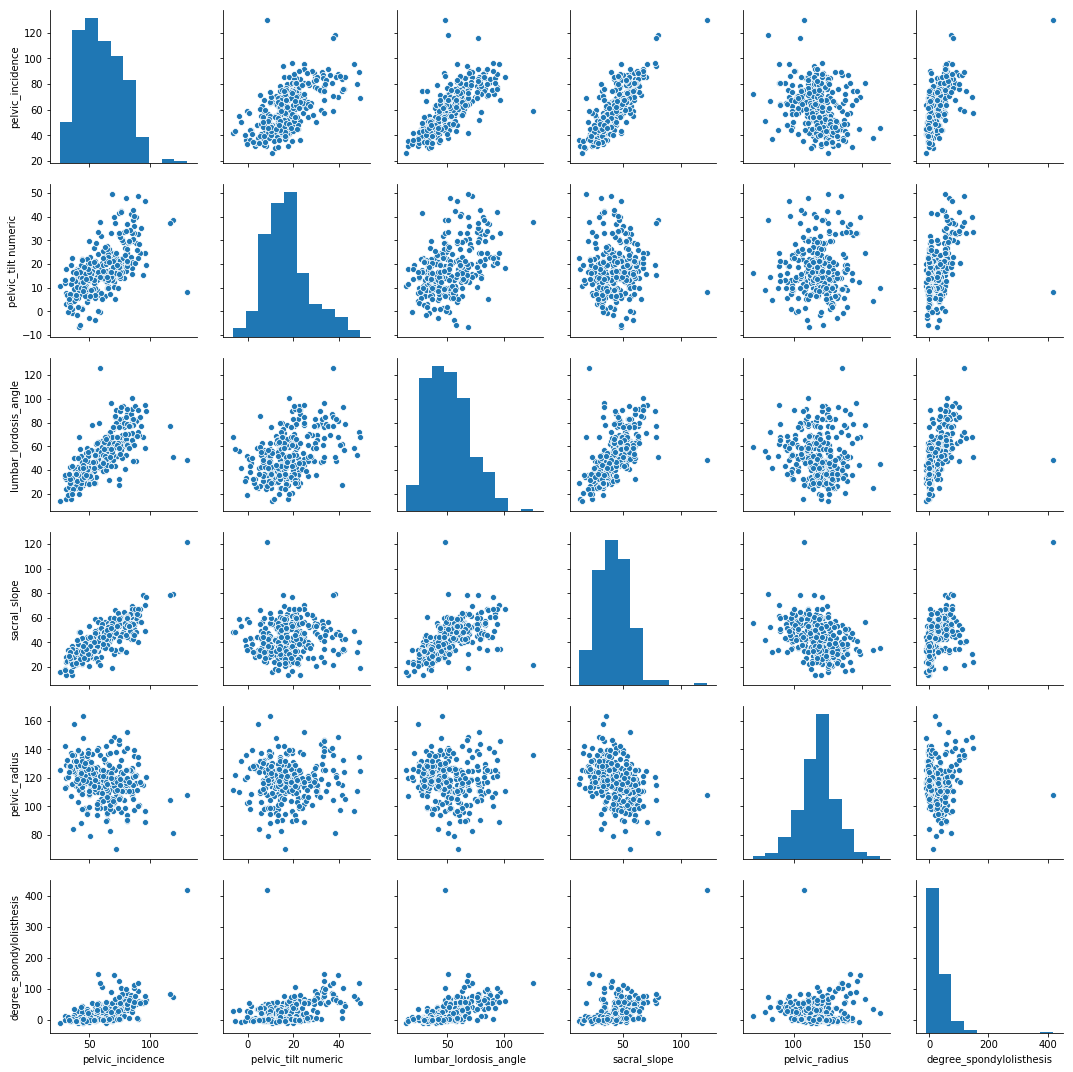

In [30]:
sns.pairplot(class2)

# Encode the Class variable to integer.

In [31]:
X = class2.iloc[:, :-1].values # Here first : means fetch all rows :-1 means except last column
Y = class2.iloc[:, 6].values # : is fetch all rows 3 means 3rd column

In [32]:
X

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       ...,
       [ 61.44659663,  22.6949683 ,  46.17034732,  38.75162833,
        125.6707246 ,  -2.70787952],
       [ 45.25279209,   8.69315736,  41.5831264 ,  36.55963472,
        118.5458418 ,   0.21475017],
       [ 33.84164075,   5.07399141,  36.64123294,  28.76764934,
        123.9452436 ,  -0.19924909]])

In [33]:
Y

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnorm

In [34]:
labelencoder_X = LabelEncoder()
Y[:, ] = labelencoder_X.fit_transform(Y[:, ]) # All rows and first column i.e country column

In [35]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [44]:
X = class2.iloc[:, :-1].values # Here first : means fetch all rows :-1 means except last column
Y=class2['class'].astype('category').cat.codes.astype('int')
labelencoder_X = LabelEncoder()

In [45]:
X

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       ...,
       [ 61.44659663,  22.6949683 ,  46.17034732,  38.75162833,
        125.6707246 ,  -2.70787952],
       [ 45.25279209,   8.69315736,  41.5831264 ,  36.55963472,
        118.5458418 ,   0.21475017],
       [ 33.84164075,   5.07399141,  36.64123294,  28.76764934,
        123.9452436 ,  -0.19924909]])

# Normalize your Data (X) to get values between 0 to 1.

In [46]:
normalized_X = (X-np.min(X))/(np.max(X)-np.min(X))

In [47]:
normalized_X

array([[0.17245293, 0.07823712, 0.11794029, 0.11995638, 0.25542545,
        0.02514839],
       [0.11665499, 0.04915994, 0.08396986, 0.09323562, 0.29204664,
        0.03636497],
       [0.18596361, 0.07745941, 0.14234216, 0.13424476, 0.27244639,
        0.0175229 ],
       ...,
       [0.16877226, 0.07856855, 0.13321312, 0.11594428, 0.31826932,
        0.01943732],
       [0.13107729, 0.04597597, 0.12253527, 0.11084188, 0.30168445,
        0.02624045],
       [0.1045151 , 0.0375515 , 0.11103182, 0.09270417, 0.31425285,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30.

In [48]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.30, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [49]:
NNH = KNeighborsClassifier(n_neighbors=3)
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [50]:
y_train

67     0
283    1
122    0
34     0
197    0
228    1
260    1
123    0
217    1
289    1
272    1
19     0
14     0
91     0
220    1
188    0
44     0
298    1
106    0
157    0
159    0
108    0
269    1
41     0
79     0
293    1
150    0
171    0
125    0
131    0
      ..
115    0
288    1
216    1
264    1
209    0
1      0
22     0
7      0
141    0
86     0
241    1
215    1
68     0
50     0
156    0
252    1
254    1
276    1
178    0
281    1
237    1
71     0
129    0
144    0
133    0
203    0
255    1
72     0
235    1
37     0
Length: 217, dtype: int32

In [51]:
NNH.fit(X_train, y_train)
NNH.score(X_test,y_test)
y_pred = NNH.predict(X_test)


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [52]:
accuracy_3 = accuracy_score(y_test, y_pred)
print ("Accuracy when k=3 : ",accuracy_3)


#Accuracy with k=5
NNH = KNeighborsClassifier(n_neighbors=5)
NNH.fit(X_train, y_train)
NNH.score(X_test,y_test)
y_pred = NNH.predict(X_test)
accuracy_5 = accuracy_score(y_test, y_pred)
print ("Accuracy when k=5 : ",accuracy_5)


#Accuracy with k=9
NNH = KNeighborsClassifier(n_neighbors=9)
NNH.fit(X_train, y_train)
NNH.score(X_test,y_test)
y_pred = NNH.predict(X_test)
accuracy_9 = accuracy_score(y_test, y_pred)
print ("Accuracy when k=9 : ",accuracy_9)

Accuracy when k=3 :  0.8602150537634409
Accuracy when k=5 :  0.8494623655913979
Accuracy when k=9 :  0.8494623655913979


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [56]:
k_list = list(range(1,20,2))
mse_scores = []
for k in k_list:
    NNH = KNeighborsClassifier(n_neighbors=k)
    NNH.fit(X_train, y_train)
    NNH.score(X_test,y_test)
    y_pred = NNH.predict(X_test)
    mse_scores.append(1-accuracy_score(y_test, y_pred))

In [59]:
print(mse_scores)

[0.16129032258064513, 0.13978494623655913, 0.15053763440860213, 0.15053763440860213, 0.15053763440860213, 0.19354838709677424, 0.12903225806451613, 0.15053763440860213, 0.12903225806451613, 0.16129032258064513]


In [60]:
min(mse_scores)
k_min = k_list[mse_scores.index(min(mse_scores))]
print(k_min)

13


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [62]:
class3=pd.read_csv("3Classdata.csv")

In [63]:
#Exploring the dataset
class3.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [64]:
class3.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [65]:
class3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [67]:
class3.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [68]:
class3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [70]:
unique_entry=class3['class'].unique()
print("unique_entry for class:",unique_entry)

unique_entry for class: ['Hernia' 'Spondylolisthesis' 'Normal']


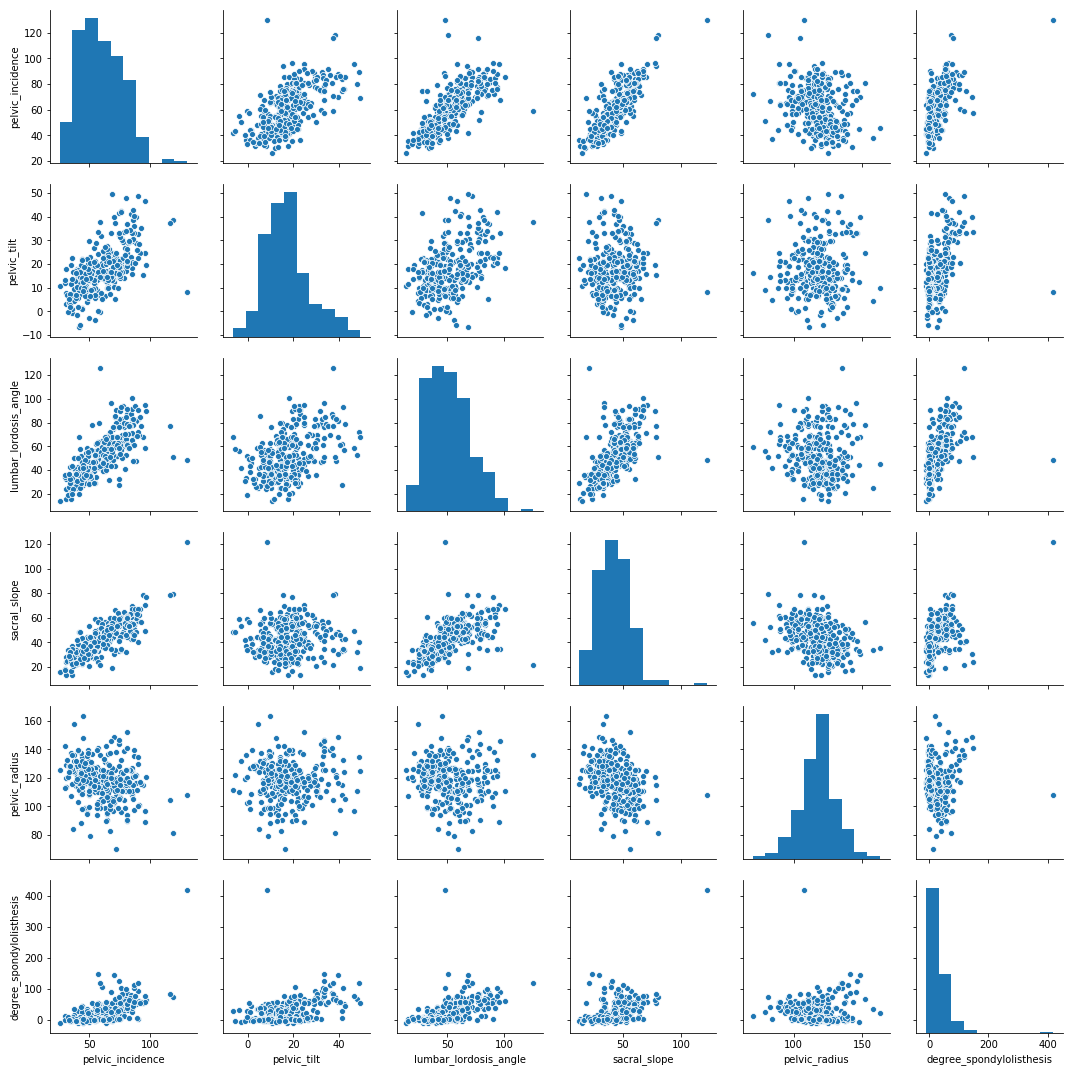

In [71]:
sns.pairplot(class3)

In [72]:
#Step to split the data into feature and test dataset
X_1 = class3.iloc[:, :-1].values # Here first : means fetch all rows :-1 means except last column
Y_1 = class3.iloc[:, 6].values 
Y_1_int=class3['class'].astype('category').cat.codes.astype('int')

In [73]:
X_1

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       ...,
       [ 61.44659663,  22.6949683 ,  46.17034732,  38.75162833,
        125.6707246 ,  -2.70787952],
       [ 45.25279209,   8.69315736,  41.5831264 ,  36.55963472,
        118.5458418 ,   0.21475017],
       [ 33.84164075,   5.07399141,  36.64123294,  28.76764934,
        123.9452436 ,  -0.19924909]])

In [74]:
Y_1

array(['Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Hernia',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', '

In [75]:
Y_1_int

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
280    1
281    1
282    1
283    1
284    1
285    1
286    1
287    1
288    1
289    1
290    1
291    1
292    1
293    1
294    1
295    1
296    1
297    1
298    1
299    1
300    1
301    1
302    1
303    1
304    1
305    1
306    1
307    1
308    1
309    1
Length: 310, dtype: int32

In [76]:
#Normalize X dataset
normalized_X_1 = (X_1-np.min(X_1))/(np.max(X_1)-np.min(X_1))

In [77]:
normalized_X_1

array([[0.17245293, 0.07823712, 0.11794029, 0.11995638, 0.25542545,
        0.02514839],
       [0.11665499, 0.04915994, 0.08396986, 0.09323562, 0.29204664,
        0.03636497],
       [0.18596361, 0.07745941, 0.14234216, 0.13424476, 0.27244639,
        0.0175229 ],
       ...,
       [0.16877226, 0.07856855, 0.13321312, 0.11594428, 0.31826932,
        0.01943732],
       [0.13107729, 0.04597597, 0.12253527, 0.11084188, 0.30168445,
        0.02624045],
       [0.1045151 , 0.0375515 , 0.11103182, 0.09270417, 0.31425285,
        0.02527676]])

In [78]:
#Split the train and test dataset in the 70:30 ratio
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(normalized_X_1, Y_1, test_size=0.30, random_state=1)


In [79]:
#Build the KNN model and predict accuracy for different values of K
NNH_1 = KNeighborsClassifier(n_neighbors=3)
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [97]:
#Accuracy with k=3
NNH_1 = KNeighborsClassifier(n_neighbors=3)
NNH_1.fit(X_1_train, y_1_train)
NNH_1.score(X_1_test,y_1_test)
y_1_pred = NNH_1.predict(X_1_test)
accuracy_3 = accuracy_score(y_1_test, y_1_pred)
print ("Accuracy when k=3 : ",accuracy_3)

#Accuracy with k=5
NNH_1 = KNeighborsClassifier(n_neighbors=5)
NNH_1.fit(X_1_train, y_1_train)
NNH_1.score(X_1_test,y_1_test)
y_1_pred = NNH_1.predict(X_1_test)
accuracy_5 = accuracy_score(y_1_test, y_1_pred)
print ("Accuracy when k=5 : ",accuracy_5)

#Accuracy with k=9
NNH_1 = KNeighborsClassifier(n_neighbors=9)
NNH_1.fit(X_1_train, y_1_train)
NNH_1.score(X_1_test,y_1_test)
y_1_pred = NNH_1.predict(X_1_test)
accuracy_9 = accuracy_score(y_1_test, y_1_pred)
print ("Accuracy when k=9:", accuracy_9)


Accuracy when k=3 :  0.8387096774193549
Accuracy when k=5 :  0.8172043010752689
Accuracy when k=9: 0.8494623655913979


In [98]:
#Optimal value of k
k_list_1 = list(range(1,20,2))
mse_scores_1 = []
for k in k_list_1:
    NNH_1 = KNeighborsClassifier(n_neighbors=k)
    NNH_1.fit(X_1_train, y_1_train)
    NNH_1.score(X_1_test,y_1_test)
    y_1_pred = NNH_1.predict(X_1_test)
    mse_scores_1.append(1-accuracy_score(y_1_test, y_1_pred))

In [99]:
print(mse_scores_1)

[0.17204301075268813, 0.16129032258064513, 0.18279569892473113, 0.16129032258064513, 0.15053763440860213, 0.18279569892473113, 0.13978494623655913, 0.17204301075268813, 0.16129032258064513, 0.17204301075268813]


In [100]:
min(mse_scores_1)
k_min = k_list_1[mse_scores_1.index(min(mse_scores_1))]
print('Optimal value of k:' ,k_min)

Optimal value of k: 13
